## 6.3 Geographic Visualization With Python

### This script contains the following:
#### 1. Import data and libraries
#### 2. Data wrangling
#### 3. Data cleaning
#### 4. Plotting a choropleth

### 1. Import data and libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import os
import folium
import json

In [2]:
import folium
import sys

print("Python executable:", sys.executable)
print("Folium version:", folium.__version__)

# Create a simple map to verify everything is working
mymap = folium.Map(location=[45.5236, -122.6750])
mymap.save("simple_map.html")
print("Map created successfully!")

Python executable: C:\Users\Lukman\anaconda3\python.exe
Folium version: 0.17.0
Map created successfully!


In [3]:
# This command propts matplotlib visuals to appear in the notebook 

%matplotlib inline

In [4]:
# Import ".json" file for the U.S. 

country_geo = r'C:\Users\Lukman\Desktop\FEMINA CF\Data Immerssion\Achievement6\us-states.json'

In [5]:
# That's just in case you want to look at the JSON file contents here too:

f = open(r'C:\Users\Lukman\Desktop\FEMINA CF\Data Immerssion\Achievement6\us-states.json',)
  
# returns JSON object asa dictionary
data = json.load(f)
  
# Iterating through the json list
for i in data['features']:
    print(i)

{'type': 'Feature', 'id': '01', 'properties': {'name': 'Alabama', 'density': 94.65}, 'geometry': {'type': 'Polygon', 'coordinates': [[[-87.359296, 35.00118], [-85.606675, 34.984749], [-85.431413, 34.124869], [-85.184951, 32.859696], [-85.069935, 32.580372], [-84.960397, 32.421541], [-85.004212, 32.322956], [-84.889196, 32.262709], [-85.058981, 32.13674], [-85.053504, 32.01077], [-85.141136, 31.840985], [-85.042551, 31.539753], [-85.113751, 31.27686], [-85.004212, 31.003013], [-85.497137, 30.997536], [-87.600282, 30.997536], [-87.633143, 30.86609], [-87.408589, 30.674397], [-87.446927, 30.510088], [-87.37025, 30.427934], [-87.518128, 30.280057], [-87.655051, 30.247195], [-87.90699, 30.411504], [-87.934375, 30.657966], [-88.011052, 30.685351], [-88.10416, 30.499135], [-88.137022, 30.318396], [-88.394438, 30.367688], [-88.471115, 31.895754], [-88.241084, 33.796253], [-88.098683, 34.891641], [-88.202745, 34.995703], [-87.359296, 35.00118]]]}}
{'type': 'Feature', 'id': '02', 'properties': {

{'type': 'Feature', 'id': '44', 'properties': {'name': 'Rhode Island', 'density': 1006}, 'geometry': {'type': 'MultiPolygon', 'coordinates': [[[[-71.196845, 41.67757], [-71.120168, 41.496831], [-71.317338, 41.474923], [-71.196845, 41.67757]]], [[[-71.530939, 42.01714], [-71.383061, 42.01714], [-71.328292, 41.781632], [-71.22423, 41.710431], [-71.344723, 41.726862], [-71.448785, 41.578985], [-71.481646, 41.370861], [-71.859555, 41.321569], [-71.799309, 41.414677], [-71.799309, 42.006186], [-71.530939, 42.01714]]]]}}
{'type': 'Feature', 'id': '45', 'properties': {'name': 'South Carolina', 'density': 155.4}, 'geometry': {'type': 'Polygon', 'coordinates': [[[-82.764143, 35.066903], [-82.550543, 35.160011], [-82.276696, 35.198349], [-81.044384, 35.149057], [-81.038907, 35.044995], [-80.934845, 35.105241], [-80.781491, 34.935456], [-80.797922, 34.820441], [-79.675149, 34.80401], [-78.541422, 33.851022], [-78.716684, 33.80173], [-78.935762, 33.637421], [-79.149363, 33.380005], [-79.187701, 33

In [6]:
# Inspect the first few entries of the GeoJSON data
print(json.dumps(data['features'][:5], indent=2))

[
  {
    "type": "Feature",
    "id": "01",
    "properties": {
      "name": "Alabama",
      "density": 94.65
    },
    "geometry": {
      "type": "Polygon",
      "coordinates": [
        [
          [
            -87.359296,
            35.00118
          ],
          [
            -85.606675,
            34.984749
          ],
          [
            -85.431413,
            34.124869
          ],
          [
            -85.184951,
            32.859696
          ],
          [
            -85.069935,
            32.580372
          ],
          [
            -84.960397,
            32.421541
          ],
          [
            -85.004212,
            32.322956
          ],
          [
            -84.889196,
            32.262709
          ],
          [
            -85.058981,
            32.13674
          ],
          [
            -85.053504,
            32.01077
          ],
          [
            -85.141136,
            31.840985
          ],
          [
            -8

In [7]:
# Define path

path = r'C:\Users\Lukman\Desktop\FEMINA CF\Data Immerssion\Achievement6\Analyzing Flight Delays'

In [8]:
# Import Data

df = pd.read_csv(os.path.join(path,'02 Data','Prepared Data','flightdelay_cleaned.csv'))

In [9]:
df.columns

Index(['Unnamed: 0', 'Flight_Date', 'Airline', 'Airline_DOT_Code',
       'Airline_Code', 'Flight_Number', 'Origin_Airport', 'Origin_City',
       'Destination_Airport', 'Destination_City', 'Scheduled_Departure_Time',
       'Actual_Departure_Time', 'Departure_Delay', 'Scheduled_Arrival_Time',
       'Actual_Arrival_Time', 'Arrival_Delay', 'Cancelled',
       'Cancellation_Code', 'Diverted', 'Scheduled_Elapsed_Time',
       'Actual_Elapsed_Time', 'Air_Time', 'Distance', 'Carrier_Delay',
       'Weather_Delay', 'NAS_Delay', 'Security_Delay', 'Late_Aircraft_Delay'],
      dtype='object')

### 2. Data Wrangling

In [10]:
# Group by origin city and calculate the average departure delay
city_delay = df.groupby('Origin_City')['Departure_Delay'].mean().reset_index()

# Rename columns for clarity
city_delay.columns = ['City', 'Average_Departure_Delay']


In [11]:
print(city_delay.head())

              City  Average_Departure_Delay
0     Aberdeen, SD                14.435976
1      Abilene, TX                 8.267735
2  Adak Island, AK                11.731707
3    Aguadilla, PR                24.018182
4        Akron, OH                10.009566


In [12]:
#convert to dataframe
df = pd.DataFrame(city_delay)
# Extract state from city names
df['State'] = df['City'].apply(lambda x: x.split(', ')[1])

# Aggregate to state level
state_data = df.groupby('State').mean().reset_index()
state_data = state_data.rename(columns={"State": "state"})
state_data.head()


,state,Average_Departure_Delay
0,AK,0.313766
1,AL,8.967168
2,AR,8.411064
3,AZ,9.069202
4,CA,10.710840


In [13]:
#Create a Dictionary for State Codes and Names

state_code_to_name = {
    'AL': 'Alabama', 'AK': 'Alaska', 'AZ': 'Arizona', 'AR': 'Arkansas', 'CA': 'California',
    'CO': 'Colorado', 'CT': 'Connecticut', 'DE': 'Delaware', 'FL': 'Florida', 'GA': 'Georgia',
    'HI': 'Hawaii', 'ID': 'Idaho', 'IL': 'Illinois', 'IN': 'Indiana', 'IA': 'Iowa',
    'KS': 'Kansas', 'KY': 'Kentucky', 'LA': 'Louisiana', 'ME': 'Maine', 'MD': 'Maryland',
    'MA': 'Massachusetts', 'MI': 'Michigan', 'MN': 'Minnesota', 'MS': 'Mississippi', 'MO': 'Missouri',
    'MT': 'Montana', 'NE': 'Nebraska', 'NV': 'Nevada', 'NH': 'New Hampshire', 'NJ': 'New Jersey',
    'NM': 'New Mexico', 'NY': 'New York', 'NC': 'North Carolina', 'ND': 'North Dakota', 'OH': 'Ohio',
    'OK': 'Oklahoma', 'OR': 'Oregon', 'PA': 'Pennsylvania', 'RI': 'Rhode Island', 'SC': 'South Carolina',
    'SD': 'South Dakota', 'TN': 'Tennessee', 'TX': 'Texas', 'UT': 'Utah', 'VT': 'Vermont',
    'VA': 'Virginia', 'WA': 'Washington', 'WV': 'West Virginia', 'WI': 'Wisconsin', 'WY': 'Wyoming',
    'DC': 'District of Columbia', 'PR': 'Puerto Rico'
}


In [14]:
# Map State Codes to State Names:

state_data['state_name'] = state_data['state'].map(state_code_to_name)

# Display the DataFrame
state_data.head()

,state,Average_Departure_Delay,state_name
0,AK,0.313766,Alaska
1,AL,8.967168,Alabama
2,AR,8.411064,Arkansas
3,AZ,9.069202,Arizona
4,CA,10.710840,California


### 3. Data Cleaning

In [15]:
# Check for missing values

state_data.isnull().sum()

state                      0
Average_Departure_Delay    0
state_name                 2
dtype: int64

In [16]:
# check duplicates
dups = state_data.duplicated()

##### Extreme values checks

<AxesSubplot:xlabel='Average_Departure_Delay', ylabel='Count'>

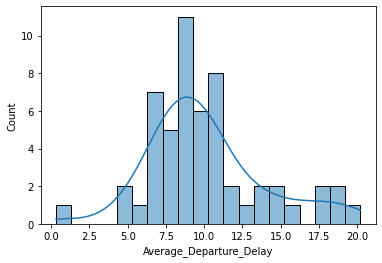

In [17]:
# Check the Average_Departure_Delay variable

sns.histplot(state_data['Average_Departure_Delay'], bins=20, kde = True)

In [18]:
# Select only entries with a non-zero rating

state_data = state_data[state_data['Average_Departure_Delay'] >= 1]

In [19]:
state_data.dtypes

state                       object
Average_Departure_Delay    float64
state_name                  object
dtype: object

### 4. Plotting Choropleth

In [25]:


import folium

# Initialize a folium map centered around the US
m = folium.Map(location=[37.0902, -95.7129], zoom_start=4)

# Create the choropleth map
folium.Choropleth(
    geo_data=data,
    name='choropleth',
    data=state_data,
    columns=['state_name', 'Average_Departure_Delay'],
    key_on='feature.properties.name',
    fill_color='YlGn',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='Average Departure Delay (minutes)'
).add_to(m)

# Add layer control
folium.LayerControl().add_to(m)

# Save the map as an HTML file
m.save('choropleth_map.html')

# Display the map
m


The choropleth map and the accompanying analysis provide valuable insights into the average departure delays across different states in the US:

Puerto Rico shows significantly higher delays compared to other states.

Texas has a lower average delay of 8.27 minutes, which is relatively better compared to other states in the analysis.

Alaska and Ohio comes in the moderate delay category.

By understanding these patterns, stakeholders can identify areas needing operational improvements and policy interventions to enhance flight punctuality.

In [21]:
state_data.to_csv(os.path.join(path, '02 Data','Prepared Data', 'state_dep_delay.csv'))